In [26]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from typing import Callable

In [31]:
def create_equation(
  f: Callable[[float], float],
  deltaT: float
) -> Callable[[float, float], float]:
  """Gets noise and delta t and compose recurrent function depending on t and x(t)

    Parameters
    ----------
    f: Callable[[float], float]
      Time-dependent noise function.
    deltaT: float
      Increment of the argument.

    Returns
    -------
    Callable[[float, float], float]
        a function, that gets t and value of x(t) and return value of x(t+1)
  """
  return lambda t, x_t: x_t + deltaT*np.sin(x_t) + deltaT*f(t)


шум это просто массив, длина которого совпадает с длинной массива точек времени. То есть на каждый таймстемп, у нас должно быть значение шума в этой точке. При этом хочется иметь функцию, в которую можно засунуть разный шум, а также менять размерность точек времени и шума

можно передавать генератор (библиотечную функцию) шума в креатор уравнения, также передавать параметры для арэнджа в видемассива и потом деструктуризовать этот аргумент сразу в аренж

# Without noise

Create recurrent equation depending on t and x(t).

In [118]:
equation = create_equation(lambda t: 0, 0.1)

In [130]:
ts = np.arange(0, 1000, 5)
x_t = np.random.rand()
x_ts = []

for t in ts:
  x_ts.append(x_t)
  x_t = equation(t, x_t)

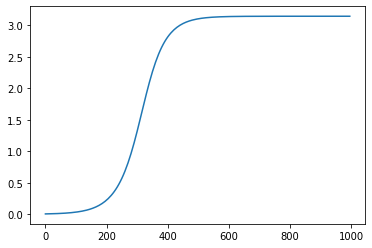

In [131]:
plt.plot(ts, x_ts)